In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
data = pd.read_csv("all_month.csv")
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-05-10T04:43:49.940Z,33.502499,-116.786163,6.38,1.10,ml,18.0,76.0,0.015410,0.11,...,2020-05-10T04:46:14.693Z,"10km NE of Aguanga, CA",earthquake,0.31,0.93,0.533,11.0,automatic,ci,ci
1,2020-05-10T04:18:40.642Z,61.482900,-149.899100,30.50,1.30,ml,NaN,NaN,NaN,0.62,...,2020-05-10T04:22:01.200Z,"5km SE of Big Lake, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
2,2020-05-10T04:14:03.901Z,61.541900,-141.089400,0.00,1.20,ml,NaN,NaN,NaN,0.77,...,2020-05-10T04:18:08.790Z,"178km E of Chitina, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
3,2020-05-10T04:13:45.233Z,63.170400,-148.991300,72.50,1.40,ml,NaN,NaN,NaN,0.89,...,2020-05-10T04:20:20.121Z,"24km S of Cantwell, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,2020-05-10T04:13:23.650Z,38.810501,-122.830833,1.28,0.56,md,8.0,109.0,0.002081,0.01,...,2020-05-10T04:33:04.937Z,"7km WNW of The Geysers, CA",earthquake,0.43,0.68,NaN,1.0,automatic,nc,nc


In [51]:
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
longitudes = data["longitude"].tolist()
latitudes = data["latitude"].tolist()
x,y = m(longitudes,latitudes)

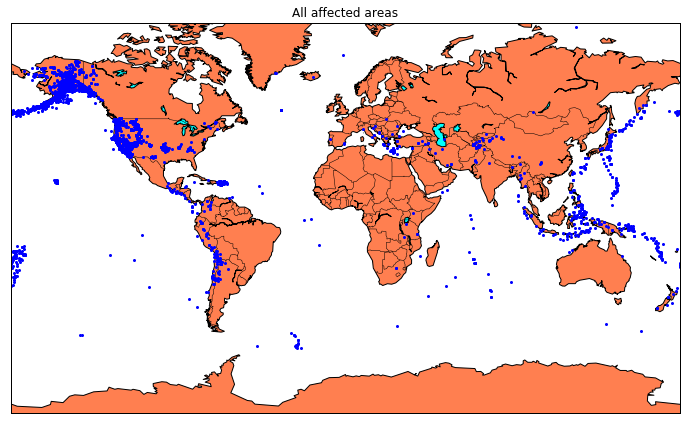

In [52]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [53]:
tmp=data.copy()
tmp["time"] = tmp["time"].apply(lambda x :x[5:10])

In [54]:
tmp.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,05-10,33.502499,-116.786163,6.38,1.10,ml,18.0,76.0,0.015410,0.11,...,2020-05-10T04:46:14.693Z,"10km NE of Aguanga, CA",earthquake,0.31,0.93,0.533,11.0,automatic,ci,ci
1,05-10,61.482900,-149.899100,30.50,1.30,ml,NaN,NaN,NaN,0.62,...,2020-05-10T04:22:01.200Z,"5km SE of Big Lake, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak
2,05-10,61.541900,-141.089400,0.00,1.20,ml,NaN,NaN,NaN,0.77,...,2020-05-10T04:18:08.790Z,"178km E of Chitina, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak
3,05-10,63.170400,-148.991300,72.50,1.40,ml,NaN,NaN,NaN,0.89,...,2020-05-10T04:20:20.121Z,"24km S of Cantwell, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak
4,05-10,38.810501,-122.830833,1.28,0.56,md,8.0,109.0,0.002081,0.01,...,2020-05-10T04:33:04.937Z,"7km WNW of The Geysers, CA",earthquake,0.43,0.68,NaN,1.0,automatic,nc,nc


In [55]:
tmp=tmp[['time','mag']].groupby(['time'],as_index=False).mean().sort_values(by='time',ascending=True)

In [56]:
tmp.head()

,time,mag
0,04-10,1.270118
1,04-11,1.445398
2,04-12,1.369234
3,04-13,1.335334
4,04-14,1.417812


Text(0, 0.5, 'Magnitude/Instensity')

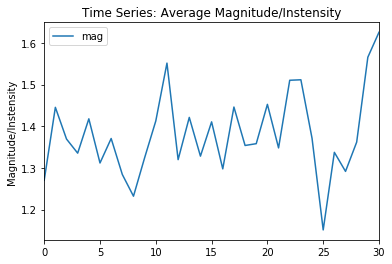

In [57]:
tmp.plot()
plt.title("Time Series: Average Magnitude/Instensity")
plt.ylabel("Magnitude/Instensity")

In [58]:
points=data[['longitude','latitude','depth']]
size = (points['depth'] - 5)**4
color = points['depth'] - points['depth'].mean()

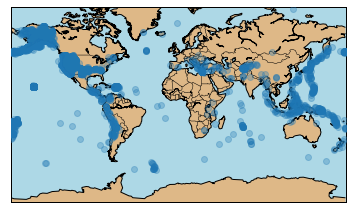

In [59]:
cmap = plt.get_cmap('coolwarm')
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='burlywood',lake_color='lightblue', zorder = 1)
m.drawmapboundary(fill_color='lightblue')
x, y = m(list(points['longitude']), list(points['latitude']))
scat = m.scatter(x, y, marker='o', zorder=10, cmap = cmap, alpha = .3)
# scat.set_color(cmap(color))
# scat.set_sizes(size)

In [60]:
minimum = data["mag"].min()
maximum = data["mag"].max()
average = data["mag"].mean()

print("mag minimum",minimum)
print("mag maximum",maximum)
print("mag average",average)

mag minimum -1.48
mag maximum 6.8
mag average 1.3685639192598822


e:\python\venv\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
e:\python\venv\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Overview of earthquake magnitudes')

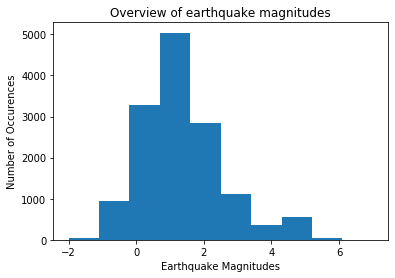

In [61]:
(n,bins, patches) = plt.hist(data["mag"], range=(-2,7), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

# print("Magnitude" +"   "+ "Number of Occurence")
# for i in range(-2, len(n)):
#     print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

In [62]:
tmp=data.copy()
tmp["time"] = tmp["time"].apply(lambda x :x[5:10])

In [63]:
tmp['count']=1
tmp.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,count
0,05-10,33.502499,-116.786163,6.38,1.10,ml,18.0,76.0,0.015410,0.11,...,"10km NE of Aguanga, CA",earthquake,0.31,0.93,0.533,11.0,automatic,ci,ci,1
1,05-10,61.482900,-149.899100,30.50,1.30,ml,NaN,NaN,NaN,0.62,...,"5km SE of Big Lake, Alaska",earthquake,NaN,0.70,NaN,NaN,automatic,ak,ak,1
2,05-10,61.541900,-141.089400,0.00,1.20,ml,NaN,NaN,NaN,0.77,...,"178km E of Chitina, Alaska",earthquake,NaN,0.60,NaN,NaN,automatic,ak,ak,1
3,05-10,63.170400,-148.991300,72.50,1.40,ml,NaN,NaN,NaN,0.89,...,"24km S of Cantwell, Alaska",earthquake,NaN,0.50,NaN,NaN,automatic,ak,ak,1
4,05-10,38.810501,-122.830833,1.28,0.56,md,8.0,109.0,0.002081,0.01,...,"7km WNW of The Geysers, CA",earthquake,0.43,0.68,NaN,1.0,automatic,nc,nc,1


Text(0, 0.5, 'frequency')

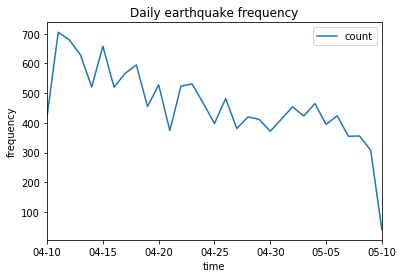

In [64]:
tmp[['time','count']].groupby(['time']).count().plot()
plt.title("Daily earthquake frequency")
plt.ylabel("frequency")

In [75]:
gapdata=data[['time','gap']].copy()
gapdata.dropna(inplace=True)
gapdata["time"] = gapdata["time"].apply(lambda x :x[5:10])

In [76]:
gapdata=gapdata[['time','gap']].groupby(['time'],as_index=False).mean().sort_values(by='time',ascending=True)

Text(0, 0.5, 'Azimuthal Gap')

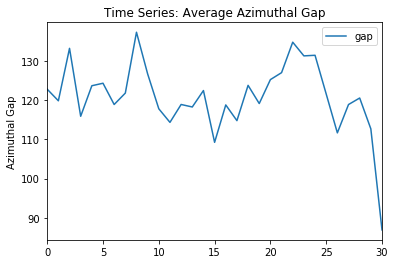

In [79]:
gapdata.plot()
plt.title("Time Series: Average Azimuthal Gap")
plt.ylabel("Azimuthal Gap")